![](https://velog.velcdn.com/images/hyejinbeck/post/5480e975-148c-424f-9ddf-782f2208548c/image.png)

![](https://velog.velcdn.com/images/hyejinbeck/post/35d30168-501c-4365-aa2f-a4e666d59ed4/image.png)

# 풀이과정 

In [44]:
# 필요함수 
import pandas as pd

In [45]:
# 불러오기 
data = pd.read_csv('./Dataset/Dataset_01.csv')
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [46]:
# 데이터 확인 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [47]:
# 결측치 갯수 확인 
data.isna().sum().sum()

26

# 상관분석

In [48]:
# 변수 확인 
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [49]:
# 필요 변수 : 상과분석용(y포함)
features = ['TV', 'Radio', 'Social_Media','Sales']

In [50]:
# 상관계수 구하기
q2 = data[features].corr()
q2

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [51]:
# Sales(y)제외
q2.drop('Sales')

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906


In [52]:
# Sales(y)제외 + Sales(y)컬럼 기준으로 상관계수 
q2.drop('Sales')['Sales']

TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [53]:
# Sales(y)제외 + Sales(y)컬럼 기준으로 상관계수 + 음수양수 구분없이 절대값 
q2.drop('Sales')['Sales'].abs()

TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [54]:
# Sales(y)제외 + Sales(y)컬럼 기준으로 상관계수 + 음수양수 구분없이 절대값 + 가장 큰 수
q2.drop('Sales')['Sales'].abs().max()

0.999497444941335

**참고**

|함수|기능|출력값|
|--|--|--|
|.max()|최대값|0.9999975128071286|
|.min()|최소값|0.7874050943998586|
|.nlargest(n)|최상위 n개의 인덱스와 상관계수|TV    0.999998|
|.nsmallest(n)|최하위 n개의 인덱스와 상관계수|Radio    0.787405|
|.idxmax()|최대값의 인덱스만|'TV'|
|.argmax()|최대값의 위치번호만|0|

In [55]:
# 소숫점 넷째자리에서 반올림
round(q2.drop('Sales')['Sales'].abs().max(), 4)

0.9995

In [56]:
goodmarketing = q2.drop('Sales')['Sales'].abs().nlargest(1)
sosomarketing = q2.drop('Sales')['Sales'].abs().nsmallest(1)

print(f'매출액에 영향력이 큰 마케팅 채널은 {goodmarketing.index[0]}이며 상관계수 {goodmarketing.values[0]:.6f}입니다.')
print(f'매출액에 영향력이 없는 마케팅 채널은 {sosomarketing.index[0]}이며 상관계수 {sosomarketing.values[0]:.6f}입니다.')

매출액에 영향력이 큰 마케팅 채널은 TV이며 상관계수 0.999497입니다.
매출액에 영향력이 없는 마케팅 채널은 Social_Media이며 상관계수 0.528906입니다.


# 회귀분석

In [58]:
# 변수확인
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [59]:
# 필요 변수 : 상과분석용(y제외)
features = ['TV', 'Radio', 'Social_Media']

In [60]:
# 결측치 제거 
q3 = data.dropna()

In [61]:
# 결측치 제거 확인
q3.isna().sum().sum()

0

In [62]:
# 회귀함수 
from sklearn.linear_model import LinearRegression

In [42]:
# 회귀모델
model = LinearRegression().fit(q3[features],q3.Sales)

In [20]:
# 가장 큰 회귀 계수 
model.coef_.max()

3.5625696271199097

In [24]:
# 가장 큰 회귀계수와 해당 변수 구하기
max_coef_index = model.coef_.argmax()
max_coef_value = model.coef_.max()
max_coef_channel = features[max_coef_index]

# 가장 적은 회귀계수와 해당 변수 구하기
min_coef_index = model.coef_.argmin()
min_coef_value = model.coef_.min()
min_coef_channel = features[min_coef_index]

# 매출액에 가장 큰 영향력, 가장 작은 영향력을 미치는 마케팅 채널 확인 
print(f'매출액에 가장 큰 영향을 미치는 마케팅 채널은 {max_coef_channel}이며, 회귀계수는 {max_coef_value:.6f}입니다.')
print(f'매출액에 가장 적은 영향을 미치는 마케팅 채널은 {min_coef_channel}이며, 회귀계수는 {min_coef_value:.6f}입니다.')

매출액에 가장 큰 영향을 미치는 마케팅 채널은 TV이며, 회귀계수는 3.562570입니다.
매출액에 가장 적은 영향을 미치는 마케팅 채널은 Radio이며, 회귀계수는 -0.003970입니다.


# 매출에 가장 효과적인 마케팅 방법
상관분석과 회귀분석 결과, <br>
매출액(Sales)에 가장 큰 영향력이 있는 마케팅 채널은 **TV** 로 확인됩니다. 

In [67]:
# 시각화 함수
import seaborn as sns

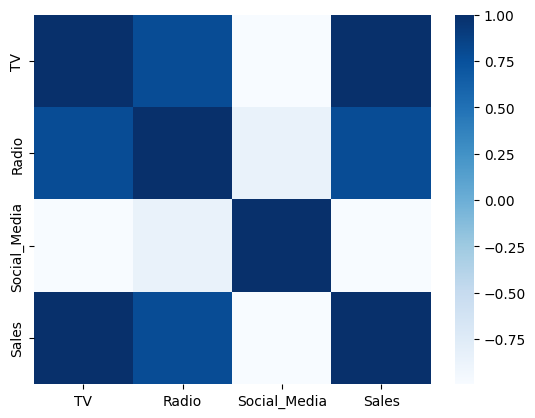

In [68]:
# 상관분석 시각화 
sns.heatmap(q2.corr(),cmap='Blues');

# 코드정리 
|문제|순서|코드|
|--|--|--|
||필요함수|import pandas as pd|
||불러오기|data = pd.read_csv('Dataset_01.csv')|
|1|결측치 갯수|data.isna().sum().sum()|
|2||세 마케팅 채널 예산(x)과 매출액(y)의 상관분석을 하여, 매출액(y)와 가장 강한 상관관계를 가지고 있는 채널의 상관계수의 소숫점 넷째자리까지 구하라(반올림)|
||필요변수(y포함)|features = ['TV', 'Radio', 'Social_Media','Sales']|
||상관계수|q2 = data[feautres].corr()|
||가장 큰 절대값|q2.drop('Sales')['Sales'].abs().max()|
||반올림|round(q2,4)|
|3||세 마케팅 채널 예산(x)과 매출액(y) 회귀분석을 하여, 세 개 독립변수의 가장 큰 회귀계수의 소수점 셋째자리까지 구하라(결측치 제거후 진행)|
||필요변수(y제외)|features = ['TV', 'Radio', 'Social_Media']|
||결측치 제거|q3 = data.dropna()|
||회귀함수|from sklearn.linear_model import LinearRegression|
||회귀모델|model = LinearRegression().fit(q3[feautres],q3.Sales)|
||회귀계수 가장 큰 값|model.coef_.max()|
